In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/full_survey_data.csv')

/var/folders/b3/glj_22g92pl25nkdvjvxnzz00000gn/T/ipykernel_961/4096187165.py:1: DtypeWarning: Columns (10,11,12,15,16,17,18,19,20,21,22,24,27,37,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,69,74,75,76,78,88,91,94,95,104,113,114,115,116,118,121,122,123,124,125,132,135,137,138,141,142,151,160,161,162,163,165,168,169,170,171,172,179,182,184,185,188,189,198,207,208,209,210,212,215,216,217,218,219,226,229,231,232,236,245,254,255,256,257,259,262,263,264,265,266,273,276,278,279,283,292,301,302,303,304,306,309,310,312,313,320,325,326,330,339,348,349,350,351,353,356,357,359,360,367,372,373,377,386,395,396,397,398,400,403,404,406,407,414,419,420,424,433,443,444,445,446,447,448,450,451,452,453,454,455,456,458,459,460,461,462,463,464,465,466,467,469,470,471,472,473,474,475,476,478,479,480,481,482,500,501,502,508,510,515,516,522,524,525,526,533,538,547,556,561,565,566,567,574,580,581,582,591,600,603,607,608,609,616,620,624,633,680,681,682,687,688,694,696,697,698,705,710,

In [3]:
df.crop_yield_1.value_counts()

crop_yield_1
2.00         3171
3.00         2882
5.00         2616
1.00         2572
10.00        2300
             ... 
24.45           1
0.35            1
1533.00         1
800333.00       1
347.00          1
Name: count, Length: 1182, dtype: int64

In [10]:
df.crop_land_area_1.value_counts().head(10)

crop_land_area_1
most         11800
half         11306
all           8743
underhalf     8307
little        2664
none           500
1.0            364
2.0            328
1              216
3.0            198
Name: count, dtype: int64

In [12]:
df.crop_harvest_kg_per_year_1.value_counts().head(30)

crop_harvest_kg_per_year_1
200.0     2839
300.0     2584
100.0     2470
500.0     2423
1000.0    2113
400.0     1891
600.0     1489
50.0      1336
150.0     1313
2000.0    1178
1500.0    1147
800.0     1041
250.0     1015
900.0      874
3000.0     814
450.0      813
700.0      812
0.0        792
1200.0     689
4000.0     522
2500.0     508
5000.0     501
350.0      477
750.0      475
225.0      419
1800.0     407
20.0       356
180.0      348
30.0       342
90.0       340
Name: count, dtype: int64

In [7]:
# Create a list for all crop_name and crop_residue_use columns
crop_cols = [f"crop_name_{i}" for i in range(1, 9)]
residue_cols = [f"crop_residue_use_{i}" for i in range(1, 9)]

# Create a list of tuples for each crop's pair of name and residue
records = []
for i in range(1, 9):
    temp_df = df[['id_unique', f'crop_name_{i}', f'crop_residue_use_{i}',f'crop_harvest_kg_per_year_{i}']].copy()
    temp_df.columns = ['id_unique', 'crop_name', 'crop_residue_use','crop_harvest_kg_per_year']
    temp_df['crop_number'] = i
    records.append(temp_df)

# Concatenate all together
long_df = pd.concat(records, ignore_index=True)

# Drop rows where crop_name is NaN
#long_df = long_df.dropna(subset=['crop_name'])

#sort
long_df = long_df.sort_values(['id_unique', 'crop_number']).reset_index(drop=True)
long_df

,id_unique,crop_name,crop_residue_use,crop_harvest_kg_per_year,crop_number
0,bf_adn_2019_10_1,millet,soil feed,1200.0,1
1,bf_adn_2019_10_1,groundnut,soil feed,NaN,2
2,bf_adn_2019_10_1,sesame,soil feed,100.0,3
3,bf_adn_2019_10_1,NaN,NaN,NaN,4
4,bf_adn_2019_10_1,NaN,NaN,NaN,5
...,...,...,...,...,...
438979,zm_scn_2017_9_1,NaN,NaN,NaN,4
438980,zm_scn_2017_9_1,NaN,NaN,NaN,5
438981,zm_scn_2017_9_1,NaN,NaN,NaN,6
438982,zm_scn_2017_9_1,NaN,NaN,NaN,7


In [8]:
final_crop_df = long_df[(long_df.crop_name.notna()) & (long_df.crop_residue_use.notna())]
final_crop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95962 entries, 0 to 438976
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_unique                 95962 non-null  object 
 1   crop_name                 95962 non-null  object 
 2   crop_residue_use          95962 non-null  object 
 3   crop_harvest_kg_per_year  92536 non-null  float64
 4   crop_number               95962 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 4.4+ MB


In [9]:
final_crop_df['burn_crop'] = final_crop_df['crop_residue_use'].str.contains('burn', case=False, na=False).astype(int)

/var/folders/b3/glj_22g92pl25nkdvjvxnzz00000gn/T/ipykernel_961/2510554493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_crop_df['burn_crop'] = final_crop_df['crop_residue_use'].str.contains('burn', case=False, na=False).astype(int)


In [10]:
final_crop_df

,id_unique,crop_name,crop_residue_use,crop_harvest_kg_per_year,crop_number,burn_crop
0,bf_adn_2019_10_1,millet,soil feed,1200.0,1,0
1,bf_adn_2019_10_1,groundnut,soil feed,NaN,2,0
2,bf_adn_2019_10_1,sesame,soil feed,100.0,3,0
8,bf_adn_2019_11_1,millet,feed soil,200.0,1,0
9,bf_adn_2019_11_1,maize,soil feed,200.0,2,0
...,...,...,...,...,...,...
438946,zm_scn_2017_96_1,sunflower,soil,250.0,3,0
438952,zm_scn_2017_97_1,maize,soil,600.0,1,0
438960,zm_scn_2017_98_1,maize,soil,1500.0,1,0
438968,zm_scn_2017_99_1,maize,soil,2750.0,1,0


In [11]:
# Step 1: Select relevant columns
name_cols = [f'livestock_name_{i}' for i in range(1, 6)]
died_cols = [f'livestock_died_{i}' for i in range(1, 6)]

# Step 2: Melt the livestock names and deaths
names_long = df.melt(id_vars='id_unique', value_vars=name_cols, 
                     var_name='animal_slot', value_name='livestock_name')

died_long = df.melt(id_vars='id_unique', value_vars=died_cols, 
                    var_name='animal_slot', value_name='livestock_died')

# Step 3: Make sure they align by extracting index number
names_long['slot'] = names_long['animal_slot'].str.extract(r'(\d+)').astype(int)
died_long['slot'] = died_long['animal_slot'].str.extract(r'(\d+)').astype(int)

# Step 4: Merge the two long DataFrames
long_df = pd.merge(
    names_long[['id_unique', 'slot', 'livestock_name']],
    died_long[['id_unique', 'slot', 'livestock_died']],
    on=['id_unique', 'slot']
)

# Optional: drop rows where animal name is missing
long_df = long_df.dropna(subset=['livestock_name']).reset_index(drop=True)

# Result: Each row is (id_unique, livestock_name, livestock_died)
print(long_df.head())

death_df = long_df[long_df.livestock_died.notna()]

         id_unique  slot livestock_name  livestock_died
0  bf_adn_2019_1_1     1          sheep             0.0
1  bf_adn_2019_2_1     1         cattle             0.0
2  bf_adn_2019_3_1     1           pigs             3.0
3  bf_adn_2019_4_1     1         cattle             0.0
4  bf_adn_2019_5_1     1         cattle             0.0


In [12]:
death_df

,id_unique,slot,livestock_name,livestock_died
0,bf_adn_2019_1_1,1,sheep,0.0
1,bf_adn_2019_2_1,1,cattle,0.0
2,bf_adn_2019_3_1,1,pigs,3.0
3,bf_adn_2019_4_1,1,cattle,0.0
4,bf_adn_2019_5_1,1,cattle,0.0
...,...,...,...,...
81614,tz_glv_2017_522_1,5,pigs,0.0
81615,tz_glv_2017_562_1,5,donkeys_horses,0.0
81616,tz_glv_2017_889_1,5,chicken,3.0
81617,tz_glv_2017_892_1,5,rabbits,0.0


In [13]:
# List of animals to keep
animals_to_keep = ['cattle', 'chicken', 'goats', 'sheep', 'donkeys_horses', 'buffalo', 'pigs']

# Filter the DataFrame
final_death_df = death_df[death_df['livestock_name'].isin(animals_to_keep)]
final_death_df


,id_unique,slot,livestock_name,livestock_died
0,bf_adn_2019_1_1,1,sheep,0.0
1,bf_adn_2019_2_1,1,cattle,0.0
2,bf_adn_2019_3_1,1,pigs,3.0
3,bf_adn_2019_4_1,1,cattle,0.0
4,bf_adn_2019_5_1,1,cattle,0.0
...,...,...,...,...
81610,tz_glv_2017_156_1,5,donkeys_horses,0.0
81614,tz_glv_2017_522_1,5,pigs,0.0
81615,tz_glv_2017_562_1,5,donkeys_horses,0.0
81616,tz_glv_2017_889_1,5,chicken,3.0


In [14]:
final_death_df.livestock_name.value_counts()

livestock_name
cattle            19497
chicken           11947
goats             11062
sheep              7885
pigs               4448
donkeys_horses     4439
buffalo             510
Name: count, dtype: int64

In [16]:
final_death_df[final_death_df.id_unique == 'bf_adn_2019_5_1']

,id_unique,slot,livestock_name,livestock_died
4,bf_adn_2019_5_1,1,cattle,0.0
44109,bf_adn_2019_5_1,2,sheep,1.0
67269,bf_adn_2019_5_1,3,goats,1.0


In [17]:
# Sum livestock deaths per farm
deaths_by_farm = (
    final_death_df.groupby("id_unique")["livestock_died"]
    .sum()
    .reset_index(name="total_livestock_died")
)

deaths_by_farm.head()


,id_unique,total_livestock_died
0,bf_adn_2019_10_1,3.0
1,bf_adn_2019_11_1,5.0
2,bf_adn_2019_12_1,1.0
3,bf_adn_2019_13_1,3.0
4,bf_adn_2019_14_1,7.0


In [18]:
deaths_by_farm[deaths_by_farm.id_unique == 'bf_adn_2019_5_1']

,id_unique,total_livestock_died
51,bf_adn_2019_5_1,2.0


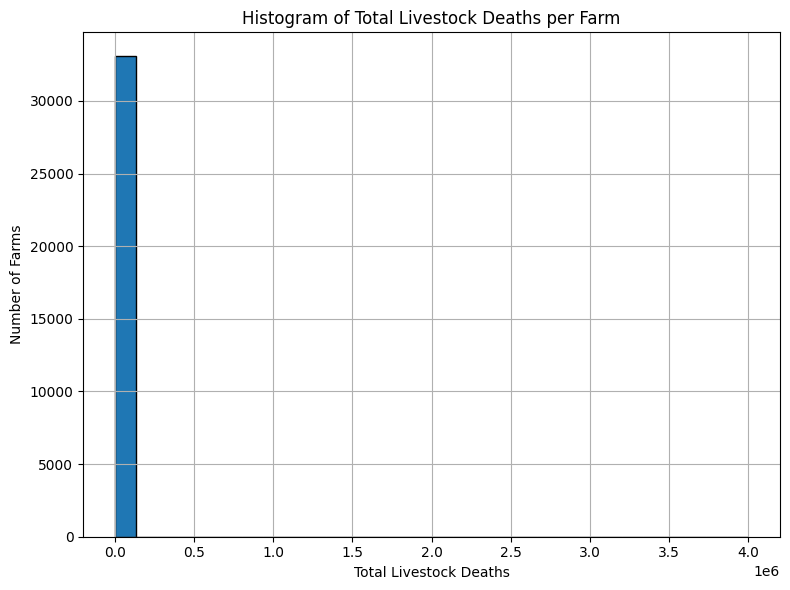

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(deaths_by_farm["total_livestock_died"], bins=30, edgecolor='black')
plt.title("Histogram of Total Livestock Deaths per Farm")
plt.xlabel("Total Livestock Deaths")
plt.ylabel("Number of Farms")
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
deaths_by_farm.total_livestock_died.describe()

count    3.306800e+04
mean     1.324936e+02
std      2.200287e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+00
max      4.000000e+06
Name: total_livestock_died, dtype: float64

In [21]:
deaths_by_farm.total_livestock_died.size

33068

In [22]:
from scipy.stats.mstats import winsorize

# Extract the data column
values = deaths_by_farm["total_livestock_died"].values

# Winsorize only the top 5%
winsorized_values = winsorize(values, limits=(0, 0.05))


In [23]:
import numpy as np


# Convert winsorized_values to a Series for easier summarizing
winsorized_series = pd.Series(winsorized_values)

# Summary statistics
summary = winsorized_series.describe()
print(summary)

count    33068.000000
mean         3.002177
std          5.359109
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         20.000000
dtype: float64


/Users/nishantshrestha/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [25]:


# Create a new column with the winsorized values
deaths_by_farm["winsorized_deaths"] = winsorized_values


In [27]:
deaths_by_farm[deaths_by_farm.total_livestock_died > 25].head()

,id_unique,total_livestock_died,winsorized_deaths
114,bf_ec3_2022_103_2,34.0,20.0
193,bf_ec3_2022_185_2,33.0,20.0
195,bf_ec3_2022_187_2,50.0,20.0
514,bf_ecd_2021_1027_1,50.0,20.0
533,bf_ecd_2021_1049_1,50.0,20.0


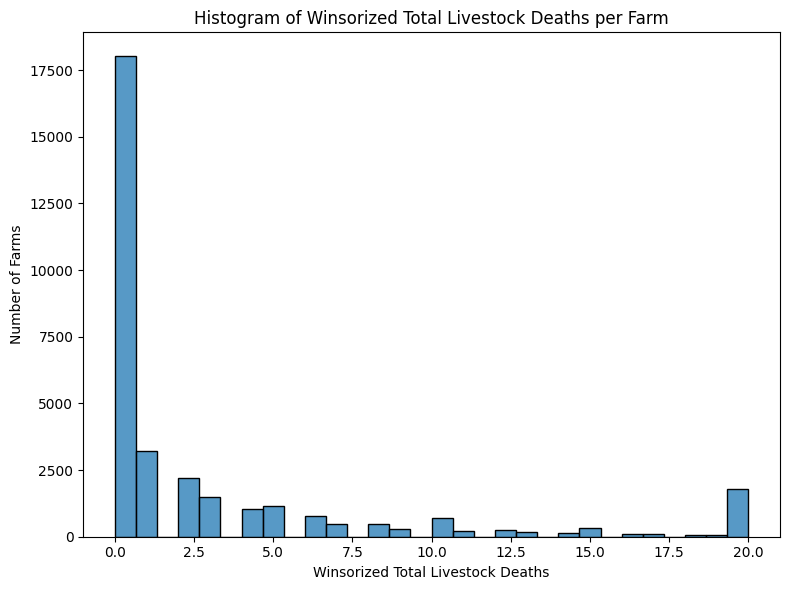

In [ ]:
import seaborn as sns 
plt.figure(figsize=(8, 6))
sns.histplot(winsorized_series, bins=30, kde=False)
plt.title("Histogram of Winsorized Total Livestock Deaths per Farm")
plt.xlabel("Winsorized Total Livestock Deaths")
plt.ylabel("Number of Farms")
plt.tight_layout()
plt.show()


In [29]:
deaths_by_farm[deaths_by_farm.total_livestock_died > 20]

,id_unique,total_livestock_died,winsorized_deaths
25,bf_adn_2019_36_1,25.0,20.0
84,bf_cir_2018_36_1,24.0,20.0
114,bf_ec3_2022_103_2,34.0,20.0
193,bf_ec3_2022_185_2,33.0,20.0
195,bf_ec3_2022_187_2,50.0,20.0
...,...,...,...
32663,zm_scn_2017_113_1,29.0,20.0
32671,zm_scn_2017_121_1,40.0,20.0
32863,zm_scn_2017_38_1,41.0,20.0
32915,zm_scn_2017_470_1,21.0,20.0


In [30]:
# Group by farm and take max of burn_crop (since 1 means burning occurred)
burning_by_farm = (
    final_crop_df.groupby("id_unique")["burn_crop"]
    .max()
    .reset_index(name="any_burning")
)

burning_by_farm.head()

,id_unique,any_burning
0,bf_adn_2019_10_1,0
1,bf_adn_2019_11_1,0
2,bf_adn_2019_12_1,0
3,bf_adn_2019_13_1,0
4,bf_adn_2019_14_1,0


In [31]:
final_crop_df[final_crop_df.burn_crop == 1].head()

,id_unique,crop_name,crop_residue_use,crop_harvest_kg_per_year,crop_number,burn_crop
658,bf_cir_2018_28_1,rice,burn,2000.0,3,1
660,bf_cir_2018_28_1,sesame,burn,NaN,5,1
3457,bf_ec3_2022_104_2,millet,soil sell burn,3200.0,2,1
3460,bf_ec3_2022_104_2,sorghum,sell feed soil burn,1200.0,5,1
3465,bf_ec3_2022_105_2,millet,soil feed sell burn,3000.0,2,1


In [34]:
burning_by_farm.any_burning.value_counts()  

any_burning
0    38058
1     6641
Name: count, dtype: int64

In [53]:
6641/(38058+6641)

0.14857155641065795

In [35]:

merged_df = pd.merge(burning_by_farm, deaths_by_farm, on="id_unique", how="inner")

# Correlation with raw total deaths
corr_total = merged_df["any_burning"].corr(merged_df["total_livestock_died"])

# Correlation with winsorized deaths
corr_winsorized = merged_df["any_burning"].corr(merged_df["winsorized_deaths"])

#
print(f"Correlation with total_livestock_died: {corr_total:.4f}")
print(f"Correlation with winsorized_deaths: {corr_winsorized:.4f}")




Correlation with total_livestock_died: -0.0024
Correlation with winsorized_deaths: 0.0322


In [38]:

import statsmodels.api as sm

X = merged_df["winsorized_deaths"]
y = merged_df["any_burning"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            any_burning   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     32.61
Date:                Fri, 08 Aug 2025   Prob (F-statistic):           1.14e-08
Time:                        09:44:04   Log-Likelihood:                -11860.
No. Observations:               31365   AIC:                         2.372e+04
Df Residuals:                   31363   BIC:                         2.374e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1399      0.00

In [39]:
# Step 1: Drop rows with missing crop harvest values
final_crop_df_clean = final_crop_df.dropna(subset=["crop_harvest_kg_per_year"]).copy()

# Step 2: Compute total harvest per farm
total_harvest = (
    final_crop_df_clean.groupby("id_unique")["crop_harvest_kg_per_year"]
    .transform("sum")
)

# Step 3: Compute harvest share for each crop
final_crop_df_clean["crop_harvest_share"] = (
    final_crop_df_clean["crop_harvest_kg_per_year"] / total_harvest
)

print(final_crop_df_clean[["id_unique", "crop_name", "crop_harvest_kg_per_year", "crop_harvest_share"]].head())


           id_unique  crop_name  crop_harvest_kg_per_year  crop_harvest_share
0   bf_adn_2019_10_1     millet                    1200.0            0.923077
2   bf_adn_2019_10_1     sesame                     100.0            0.076923
8   bf_adn_2019_11_1     millet                     200.0            0.400000
9   bf_adn_2019_11_1      maize                     200.0            0.400000
10  bf_adn_2019_11_1  groundnut                     100.0            0.200000


In [43]:
# Create a new column called burn_share
final_crop_df_clean["burn_share"] = (
    final_crop_df_clean["crop_harvest_share"] * final_crop_df_clean["burn_crop"]
)


In [44]:
# Group by farm and sum burn_share
burn_share_by_farm = (
    final_crop_df_clean.groupby("id_unique")["burn_share"]
    .sum()
    .reset_index(name="total_burn_share")
)
print(burn_share_by_farm.head())

          id_unique  total_burn_share
0  bf_adn_2019_10_1               0.0
1  bf_adn_2019_11_1               0.0
2  bf_adn_2019_12_1               0.0
3  bf_adn_2019_13_1               0.0
4  bf_adn_2019_14_1               0.0


In [45]:
final_crop_df[final_crop_df.id_unique == 'bf_adn_2019_10_1']

,id_unique,crop_name,crop_residue_use,crop_harvest_kg_per_year,crop_number,burn_crop
0,bf_adn_2019_10_1,millet,soil feed,1200.0,1,0
1,bf_adn_2019_10_1,groundnut,soil feed,NaN,2,0
2,bf_adn_2019_10_1,sesame,soil feed,100.0,3,0


In [47]:
burn_share_by_farm.describe()

,total_burn_share
count,44159.000000
mean,0.097706
std,0.273257
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


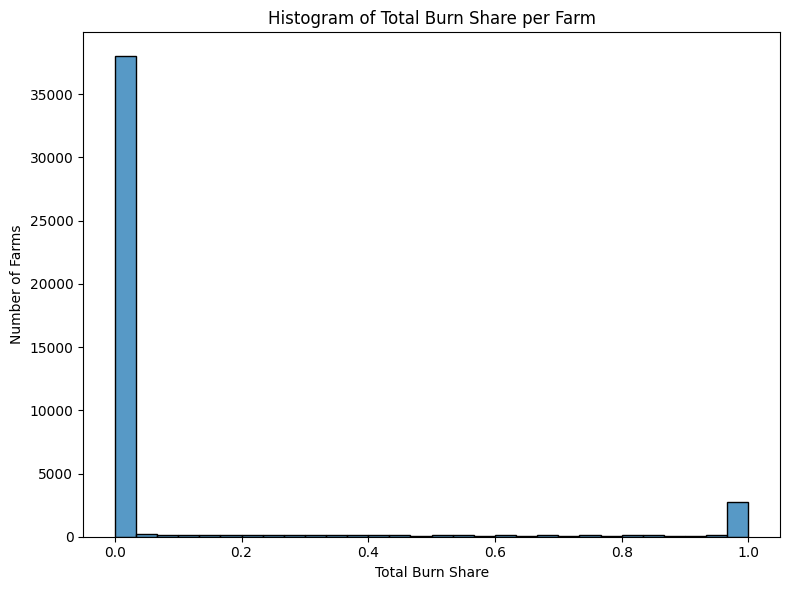

In [48]:
\

plt.figure(figsize=(8, 6))
sns.histplot(burn_share_by_farm["total_burn_share"], bins=30, kde=False)
plt.title("Histogram of Total Burn Share per Farm")
plt.xlabel("Total Burn Share")
plt.ylabel("Number of Farms")
plt.tight_layout()
plt.show()


In [49]:
#
merged_farm_df = pd.merge(burn_share_by_farm, deaths_by_farm, on="id_unique", how="inner")

# Pearson correlation
corr = merged_farm_df["total_burn_share"].corr(merged_farm_df["winsorized_deaths"])
print(f"Correlation between total_burn_share and winsorized_deaths: {corr:.4f}")


Correlation between total_burn_share and winsorized_deaths: 0.0218


In [50]:

# Define variables
X = merged_farm_df["winsorized_deaths"]
y = merged_farm_df["total_burn_share"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       total_burn_share   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.75
Date:                Fri, 08 Aug 2025   Prob (F-statistic):           0.000123
Time:                        09:55:04   Log-Likelihood:                -2207.8
No. Observations:               31016   AIC:                             4420.
Df Residuals:                   31014   BIC:                             4436.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0871      0.00

crop_yield_units_1
kg                                    17309
sacks_100kg                            6903
sacks_50kg                             6693
sacks_100kg_quintal                    6202
tonnes                                 1320
                                      ...  
bag(40kg)                                 1
petite quantité donc n'a pas battu        1
tins (gorogoro)                           1
charette.                                 1
bundles(100kgsx1)                         1
Name: count, Length: 622, dtype: int64